# Question 3

In [1]:
# Necessary imports
import numpy as np
import matplotlib.pyplot as plt # for bar plots
from scipy.special import comb # for efficient combination computation

In [2]:
# QUESTION 3
print('QUESTION 3\n')

# PART A
print('PART A\n')

# Constants obtained from tasks involving language engagement
ACTIVE_L = 103 # number of positive Broca activations
TOTAL_L = 869 # total number of trials

# Constants obtained from tasks not involving language engagement
ACTIVE_NL = 199 # number of positive Broca activations
TOTAL_NL = 2353 # total number of trials

QUESTION 3

PART A



In [3]:
def likelihood_beurnoulli(prob, num_positive, total):
    """
    Likelihood function of the beurnoulli distribution.
    Args:
        prob: The probability that a binary event has a postive outcome
        num_positive: Number of positive outcomes
        total: Total number of observations/trials
    Returns:
        likelihood: The likelihood of having the beurnoulli distribution 
            with the specified arguments
    """
    num_negative = total - num_positive
    likelihood = (prob ** num_positive) * ((1 - prob) ** num_negative)
    likelihood *= comb(total, num_positive)
    return likelihood

In [4]:
x = np.arange(0, 1.001, 0.001) # probability values to try
# Compute the likelihood vectors for language invloving tasks and others
likelihoods_l = likelihood_beurnoulli(x, ACTIVE_L, TOTAL_L)
likelihoods_nl = likelihood_beurnoulli(x, ACTIVE_NL, TOTAL_NL)

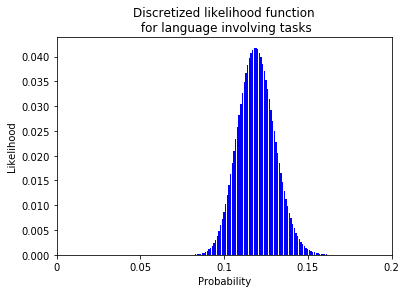

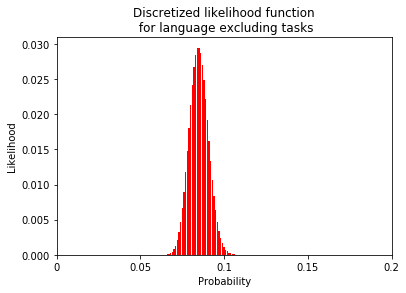

In [5]:
# Plot likelihoods_l
figure_num = 1
plt.figure(figure_num)
figure_num += 1
plt.bar(np.arange(len(x)), likelihoods_l, color='b')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 201, step=50), (0, 0.05, 0.1, 0.15, 0.2))
plt.xlabel('Probability')
plt.ylabel('Likelihood')
plt.title('Discretized likelihood function\n for language involving tasks')
plt.show(block=False)

# Plot likelihoods_nl
plt.figure(figure_num)
figure_num += 1
plt.bar(np.arange(len(x)), likelihoods_nl, color='r')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 201, step=50), (0, 0.05, 0.1, 0.15, 0.2))
plt.xlabel('Probability')
plt.ylabel('Likelihood')
plt.title('Discretized likelihood function\n for language excluding tasks')
plt.show(block=False)

In [6]:
# PART B
print('PART B\n')

x_l_max = x[np.argmax(likelihoods_l)]
print('The probability that maximizes the discretized likelihood of the data ' +
      'obtained from the language involving tasks: %.3f, %.5f' % (x_l_max, 
      likelihood_beurnoulli(x_l_max, ACTIVE_L, TOTAL_L)))
x_nl_max = x[np.argmax(likelihoods_nl)]
print('The probability that maximizes the discretized likelihood of the data ' +
      'obtained from the language excluding tasks: %.3f, %.5f' % (x_nl_max, 
      likelihood_beurnoulli(x_nl_max, ACTIVE_NL, TOTAL_NL)))

PART B

The probability that maximizes the discretized likelihood of the data obtained from the language involving tasks: 0.119, 0.04180
The probability that maximizes the discretized likelihood of the data obtained from the language excluding tasks: 0.085, 0.02946



PART C



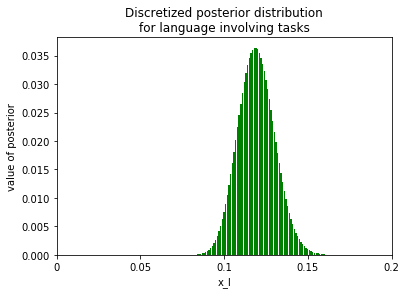

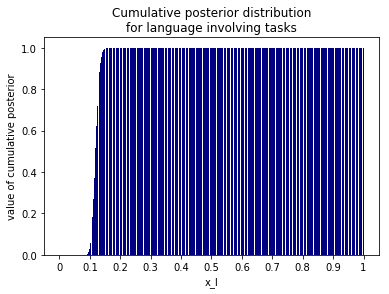

lower and higher 95% confidence bounds of x_l respectively: (0.098, 0.141)


In [7]:
# PART C
print('\nPART C\n')

# Assumption is a uniform prior
uniform_prior = 1 / len(x)
# Marginalize the prior out in the conditional distribution to compute
# the normalizer
normalizer_l = np.sum(likelihoods_l * uniform_prior)
# Apply Bayes rule
posterior_l = likelihoods_l * uniform_prior / normalizer_l

# Plot posterior_l
plt.figure(figure_num)
figure_num += 1
plt.bar(np.arange(len(x)), posterior_l, color='g')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 201, step=50), (0, 0.05, 0.1, 0.15, 0.2))
plt.xlabel('x_l')
plt.ylabel('value of posterior')
plt.title('Discretized posterior distribution\nfor language involving tasks')
plt.show(block=False)

# Compute the cumulative distribution
cdf_l = np.array([np.sum(posterior_l[:i]) for i in range(1, len(x) + 1)])

# Plot cdf_l
plt.figure(figure_num)
figure_num += 1
plt.bar(np.arange(len(x)), cdf_l, color='navy')
plt.xticks(np.arange(len(x), step=100), 
           (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1))
plt.xlabel('x_l')
plt.ylabel('value of cumulative posterior')
plt.title('Cumulative posterior distribution\nfor language involving tasks')
plt.show(block=False)

# Approximating the lower and higher 95% confidence bounds using the cdf
index_lower = np.argmin(np.abs(cdf_l - 0.025))
index_upper = np.argmin(np.abs(cdf_l - 0.975))
print('lower and higher 95%% confidence bounds of x_l respectively: (%.3f, %.3f)' % 
      (x[index_lower], x[index_upper]))

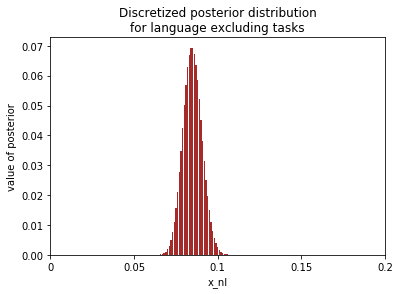

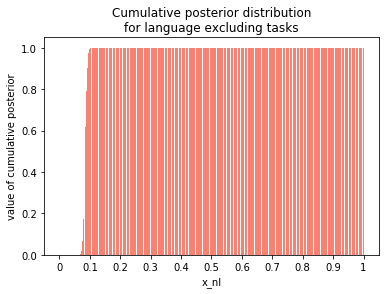

lower and higher 95% confidence bounds of x_nl respectively: (0.073, 0.096)


In [8]:
# Marginalize the prior out in the conditional distribution to compute
# the normalizer
normalizer_nl = np.sum(likelihoods_nl * uniform_prior)
# Apply Bayes rule
posterior_nl = likelihoods_nl * uniform_prior / normalizer_nl

# Plot posterior_nl
plt.figure(figure_num)
figure_num += 1
plt.bar(np.arange(len(x)), posterior_nl, color='brown')
plt.xlim(0, 200)
plt.xticks(np.arange(0, 201, step=50), (0, 0.05, 0.1, 0.15, 0.2))
plt.xlabel('x_nl')
plt.ylabel('value of posterior')
plt.title('Discretized posterior distribution\nfor language excluding tasks')
plt.show(block=False)

# Compute the cumulative distribution
cdf_nl = np.array([np.sum(posterior_nl[:i]) for i in range(1, len(x) + 1)])

# Plot cdf_nl
plt.figure(figure_num)
figure_num += 1
plt.bar(np.arange(len(x)), cdf_nl, color='salmon')
plt.xticks(np.arange(len(x), step=100), 
           (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1))
plt.xlabel('x_nl')
plt.ylabel('value of cumulative posterior')
plt.title('Cumulative posterior distribution\nfor language excluding tasks')
plt.show(block=False)

# Approximating the lower and higher 95% confidence bounds using the cdf
index_lower = np.argmin(np.abs(cdf_nl - 0.025))
index_upper = np.argmin(np.abs(cdf_nl - 0.975))
print('lower and higher 95%% confidence bounds of x_nl respectively: (%.3f, %.3f)' % 
      (x[index_lower], x[index_upper]))


PART D



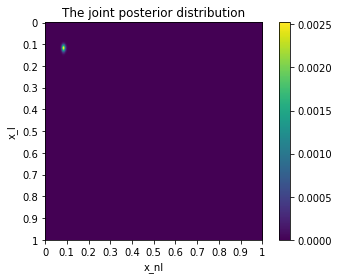

Sum of the posterior probabilities such that x_l > x_nl:  0.9978520275861361
Sum of the posterior probabilities such that x_l <= x_nl:  0.002147972413864108


In [9]:
# PART D
print('\nPART D\n')

joint_posterior = np.ma.outer(posterior_l, posterior_nl) # outer product
 
plt.figure(figure_num)
figure_num += 1
plt.imshow(joint_posterior)
plt.colorbar()
plt.title('The joint posterior distribution')
plt.xlabel('x_nl')
plt.ylabel('x_l')
plt.xticks(np.arange(len(x), step=100),
           (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1))
plt.yticks(np.arange(len(x), step=100),
           (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1))
plt.show(block=False)

# x_l > x_nl corresponds to the lower triangular part
mask = np.zeros((len(x), len(x)), dtype=bool)
mask[np.tril_indices(len(x), k=-1)] = True
sum_x_l_greater = np.sum(joint_posterior[mask]) # masking
print('Sum of the posterior probabilities such that x_l > x_nl: ', sum_x_l_greater)
# x_l <= x_nl corresponds to the diagonal and upper triangular parts
sum_x_l_less_equal = np.sum(joint_posterior[np.logical_not(mask)])
print('Sum of the posterior probabilities such that x_l <= x_nl: ', sum_x_l_less_equal)

In [10]:
# PART E
print('\nPART E\n')

PROB_L = 0.5 # probability of language involvement
prob_nl = 1 - PROB_L
prob_active = x_l_max * PROB_L + x_nl_max * prob_nl # additivity axiom 
# Apply Bayes Rule
prob_l_given_active = x_l_max * PROB_L / prob_active
print('P(language|activation) is computed as: ', prob_l_given_active)


PART E

P(language|activation) is computed as:  0.5833333333333334


In [11]:
# Show all figures
plt.show()